# Module 3 R Exercise

In these exercises, we will use ggplot2 functions to plot some statistical plots about a data set. Have your ggplot2 cheatsheets and documentation handy to find the right parameters for the functions. 

Let's read the house sales data.

In [1]:
library(ggplot2)

County_data = read.csv("../../../datasets/house_sales_in_king_county/kc_house_data.csv",header=TRUE,sep=",")
head(County_data)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


There are two rows in the dataset with number of bedrooms greater than 10 but the price is very low. Let's remove those outliers from the data. 

In [2]:
County_data=County_data[!County_data$bedrooms>10,]

**Exercise 1: ** Run str and summmary commands on the data set and give your best guess about which atrributes are nominal variables. Justify your answer. 

In [ ]:
#waterfront,view,condition,grade,year_renovated,date are nominal variables

In [3]:
# <-- YOUR ANSWER HERE -->
str(County_data)
summary(County_data)


'data.frame':	21611 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140626T000000:  131   1st Qu.: 321725   1st Qu.: 3.000  
 Median :3.905e+09   20140625T000000:  130   Median : 450000   Median : 3.000  
 Mean   :4.581e+09   20140708T000000:  127   Mean   : 540084   Mean   : 3.369  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :10.000  
                     (Other)        :20832                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1426   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7620   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15108   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

**Exercise 2: ** Plot the variables sqft_living and price on x and y axes of a scatter plot, respectively.

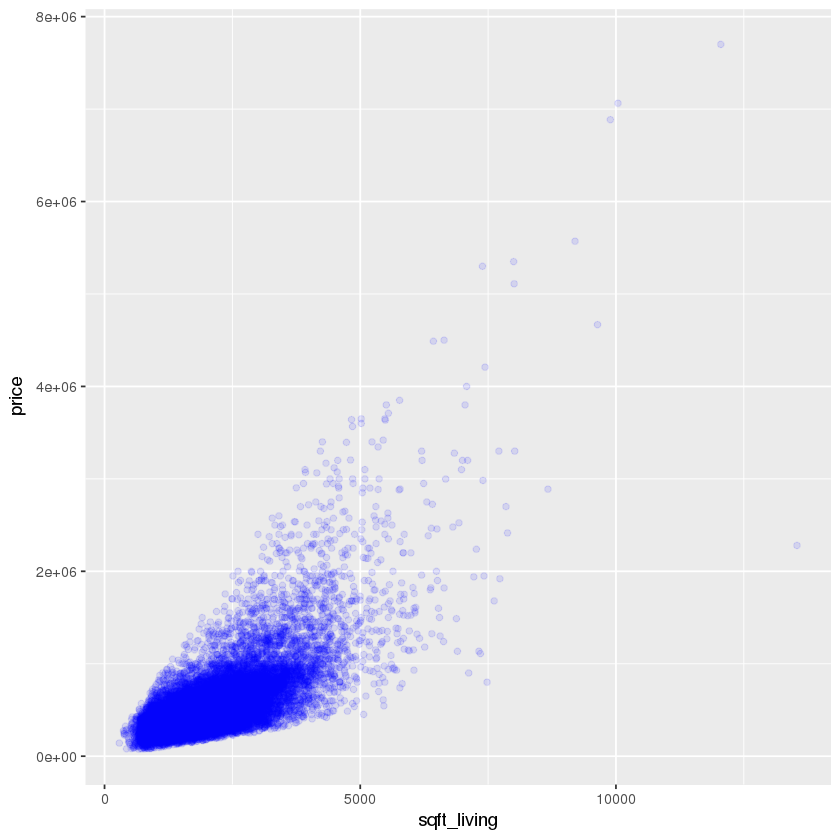

In [4]:
p <- ggplot( County_data,aes(x=sqft_living,y=price)) + geom_point(alpha=0.1, color="blue")
p

We can't really see anything here, let's try the same plot with log scales. 

**Exercise 3: ** Plot the above axes (both x and y) in log10 scale. 

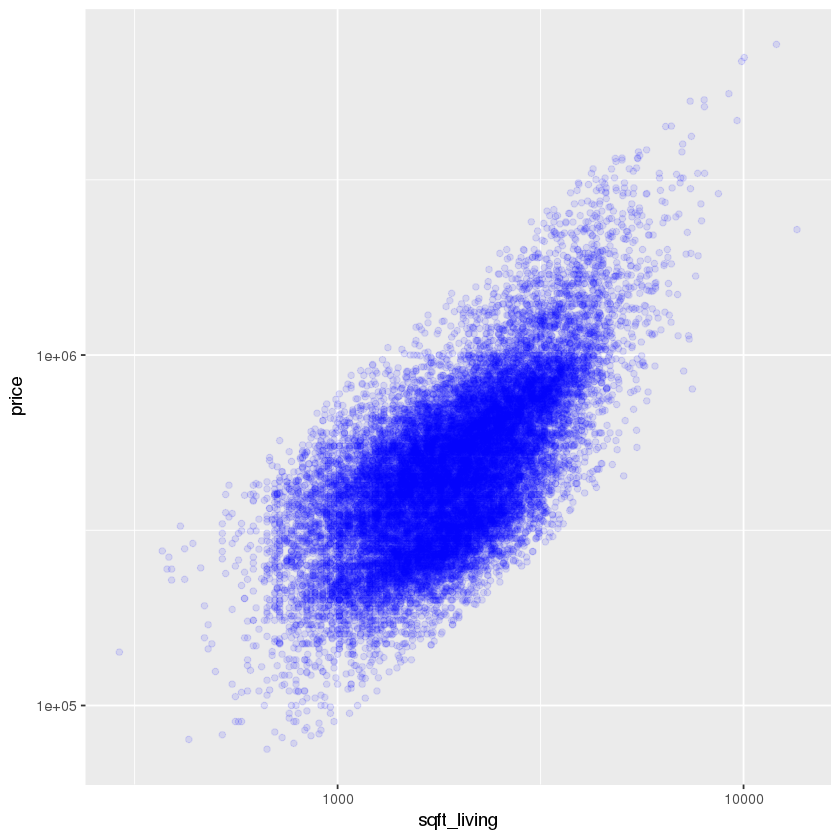

In [5]:
p + scale_x_log10() + scale_y_log10()

This gives a better relation between price and square footage. Let's plot a histogram of price. That is the distribution of prices for all houses. 

**Exercise 4: ** Plot a histogram of price with a binwidth of 30000.

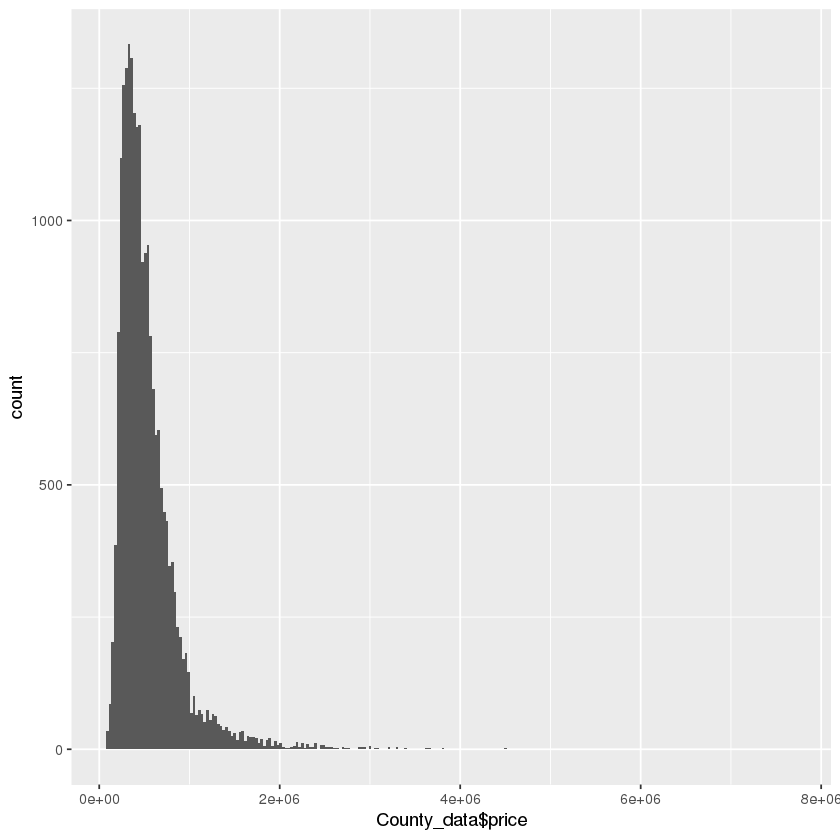

In [7]:
g <- ggplot(County_data,aes(County_data$price)) + geom_histogram(binwidth=30000)
g

We can also plot the probability density function of the price, it will look like a smoothed version of the histogram.

**Exercise 5: ** Plot the density of price using geom_density. 

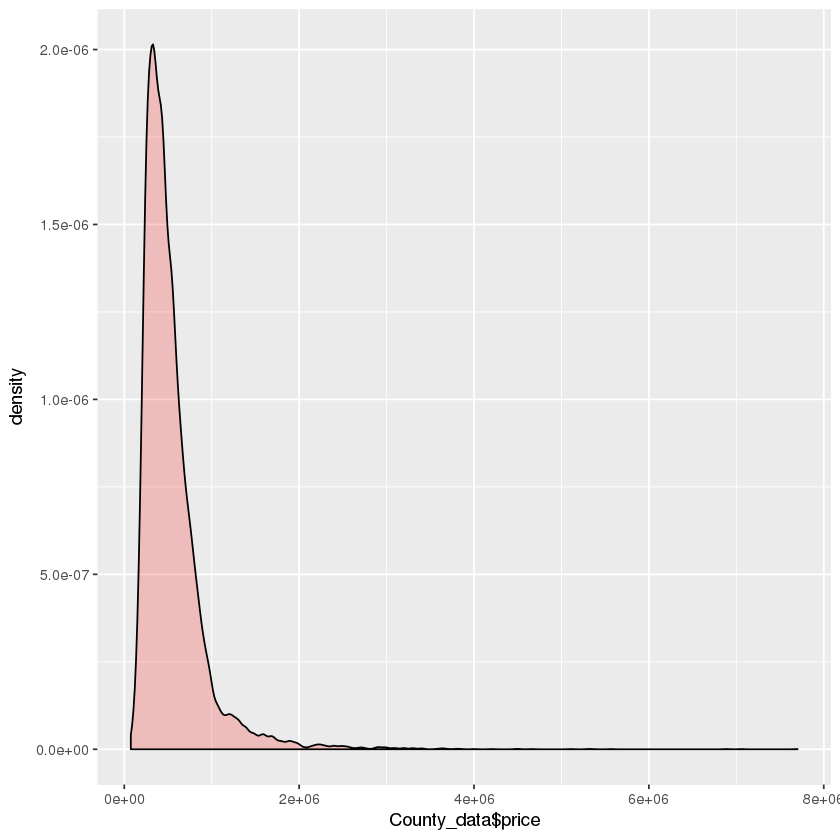

In [8]:
g <-ggplot(County_data,aes(County_data$price)) + geom_density(alpha=0.2, fill="red")
g


Let's work on the subset of the data; we will look only at houses that are less than $2M. 

In [9]:
lowprice_houses = County_data[County_data$price<2000000,]

We can plot multiple densities on the same plot to see how the price distribution differs with respect to some attribute. We should use alpha transparency in geom_density to see different distributions.

**Exercise 6: ** Plot multiple densities of of price with respect to number of bedrooms. 

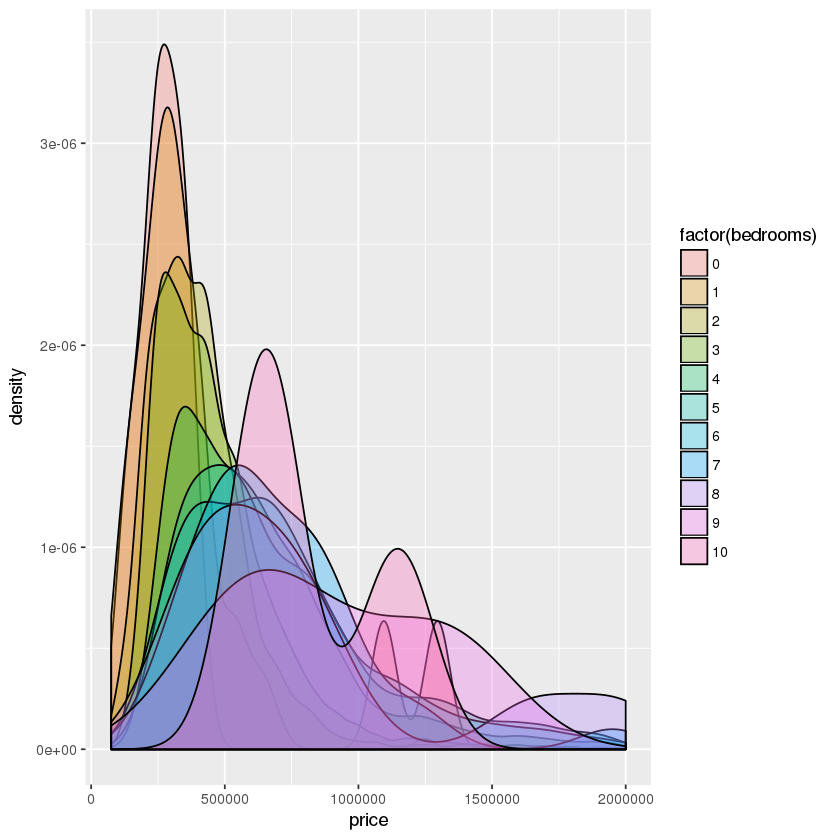

In [10]:
p<-ggplot(lowprice_houses , aes(x=price, fill=factor(bedrooms))) + geom_density(alpha=0.3)
p

This works well if there aren't too many classes; here we can't see much so let's use the facet_wrap() to create small multiples to compare densities for different number of bedrooms. 

**Exercise 7: ** Plot small multiples of price densities with respect to number of bedrooms. 

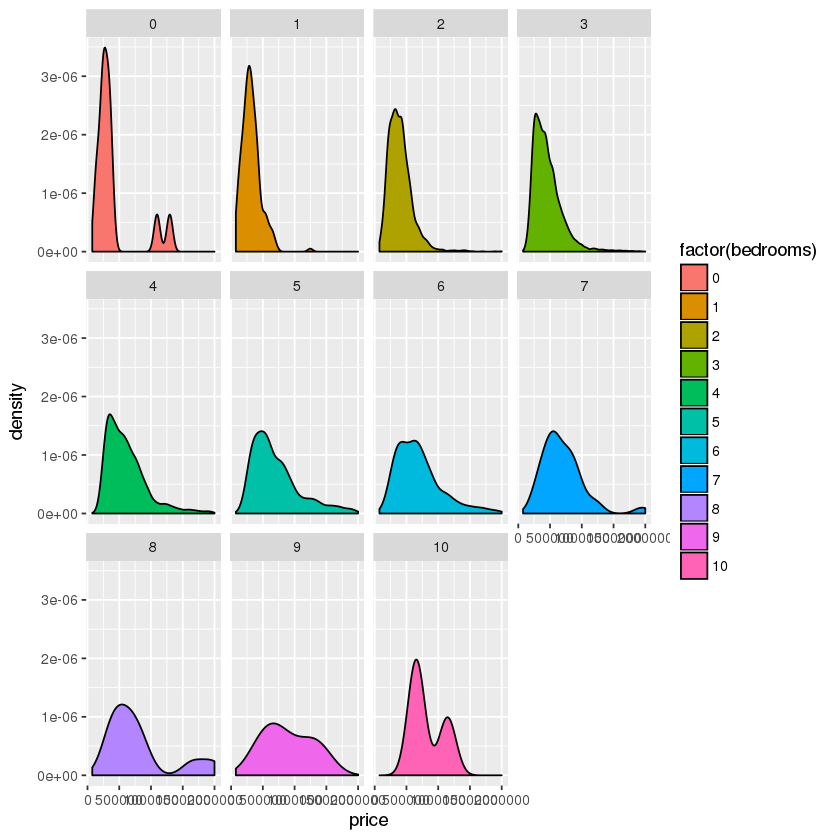

In [11]:
ggplot(lowprice_houses , aes(x=price,fill=factor(bedrooms))) + geom_density() + facet_wrap(~bedrooms)

Here we can see that up to four bedrooms, the price distribution is narrow; after that the variance of the price increases. 
Let's see the distribution for number of floors.

**Exercise 8: ** Plot small multiples of price densities with respect to number of floors. 

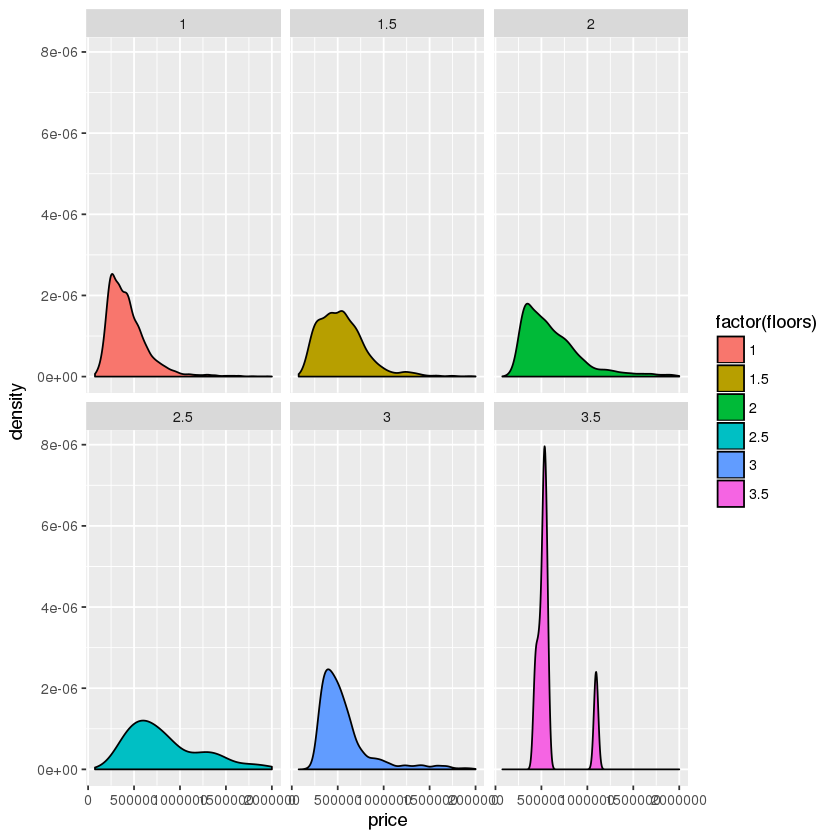

In [12]:
ggplot(lowprice_houses , aes(x=price,fill=factor(floors))) + geom_density() +  facet_wrap(~floors)

Let's plot a scatter plot for price vs. square footage with small multiples for number of bedrooms and use color for the number of floors using a sequential brewer palette.

**Exercise 9: ** Plot small multiples of price densities with respect to number of bedrooms. 

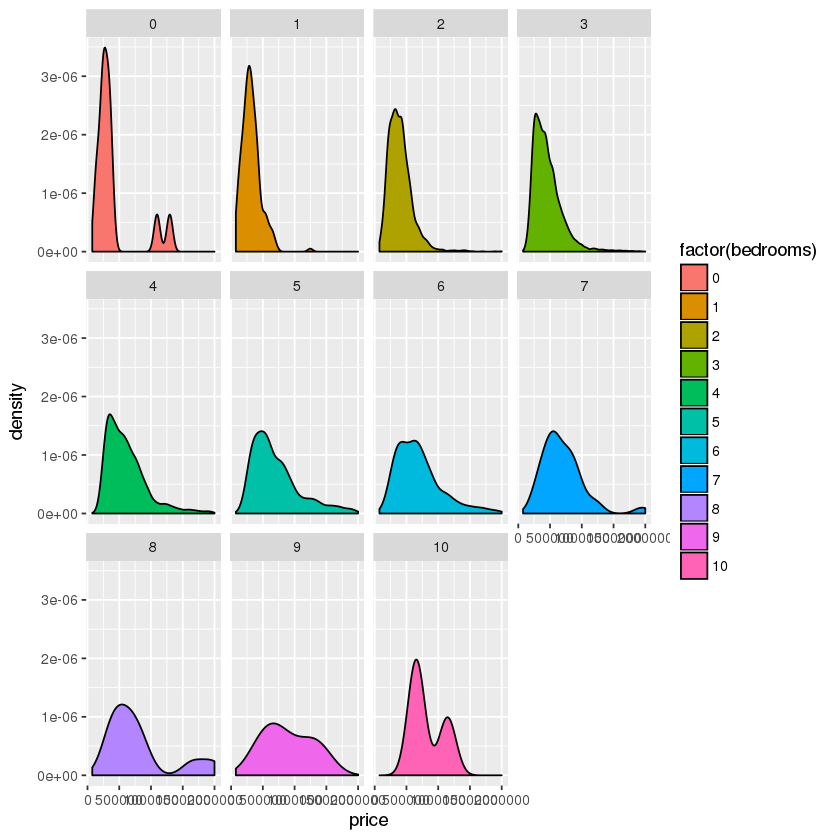

In [13]:
e <- ggplot(lowprice_houses, aes(x=price,fill=factor(bedrooms))) + geom_density() 
e <- e + facet_wrap(~bedrooms) + scale_color_brewer(palette = "Blues")
e

**Exercise 9: ** Let's make the axes log scale. 

Warning message:
“Transformation introduced infinite values in continuous y-axis”

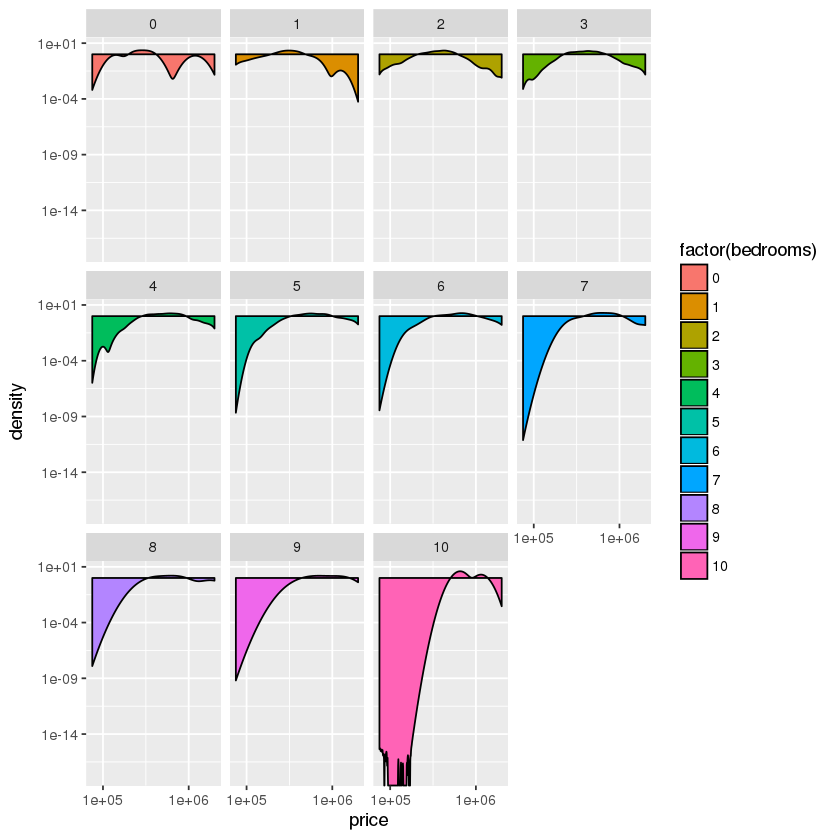

In [14]:
e <- e + scale_x_log10()+ scale_y_log10()
e

Let's look at a different data set. This one is about a survey of students enrolled in a class and some information about them was collected about their behavior, demographics, etc. 

In [15]:
ecg = read.csv("../../../datasets/eyecolorgender/eyecolorgenderdata.csv",header=TRUE,sep=",")
head(ecg)

gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
female,18,first,hazel,68,195,0,1,20,Yes,3,75,6,18
male,20,third,brown,70,120,3,0,24,No,0,50,0,3
female,18,first,green,67,200,0,1,35,Yes,3,53,8,1
male,23,fourth,hazel,74,140,1,1,5,Yes,25,50,0,7
female,19,second,blue,62,60,0,1,5,Yes,4,30,2,5
male,19,second,green,67,0,0,1,5,Yes,8,100,0,10


**Exercise 10: ** Name the nominal and ordinal variables in this data set. 

In [16]:
# your answer here
str(ecg)
summary(ecg)
#Year is nominal,gender is nominal,eyecolor is nominal,exercise is nominal.
# age,height,miles,brothers,sisters,computertime,exercisehours,musiccds,playgames,watchtv are 
# quantitative.

'data.frame':	1990 obs. of  14 variables:
 $ gender       : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 2 2 1 2 ...
 $ age          : int  18 20 18 23 19 19 37 22 26 21 ...
 $ year         : Factor w/ 5 levels "first","fourth",..: 1 5 1 2 4 4 5 5 2 5 ...
 $ eyecolor     : Factor w/ 5 levels "blue","brown",..: 4 2 3 4 1 3 2 2 2 1 ...
 $ height       : int  68 70 67 74 62 67 74 73 70 68 ...
 $ miles        : num  195 120 200 140 60 0 511 210 120 90 ...
 $ brothers     : int  0 3 0 1 0 0 1 3 2 1 ...
 $ sisters      : int  1 0 1 1 1 1 1 2 1 1 ...
 $ computertime : num  20 24 35 5 5 5 3 2 5 5 ...
 $ exercise     : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 1 2 1 2 ...
 $ exercisehours: num  3 0 3 25 4 8 0 10 0 3 ...
 $ musiccds     : int  75 50 53 50 30 100 50 100 130 34 ...
 $ playgames    : num  6 0 8 0 2 0 3 6 0 0.5 ...
 $ watchtv      : num  18 3 1 7 5 10 8 10 20 5 ...


    gender          age            year      eyecolor       height     
 female:1079   Min.   :17.00   first :233   blue :706   Min.   :44.00  
 male  : 911   1st Qu.:19.00   fourth:308   brown:606   1st Qu.:65.00  
               Median :20.00   other :134   green:297   Median :68.00  
               Mean   :20.64   second:668   hazel:341   Mean   :68.31  
               3rd Qu.:21.00   third :647   other: 40   3rd Qu.:71.00  
               Max.   :56.00                            Max.   :85.00  
                                                                       
     miles            brothers        sisters       computertime    exercise  
 Min.   :    0.0   Min.   :0.000   Min.   :0.000   Min.   :  0.00   No : 737  
 1st Qu.:   50.0   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:  5.00   Yes:1253  
 Median :  129.5   Median :1.000   Median :1.000   Median : 10.00             
 Mean   :  310.7   Mean   :1.051   Mean   :1.015   Mean   : 12.27             
 3rd Qu.:  210.0   3rd Qu.:2.

**Exercise 11: ** Plot a scatter plot of gender vs. eyecolor.

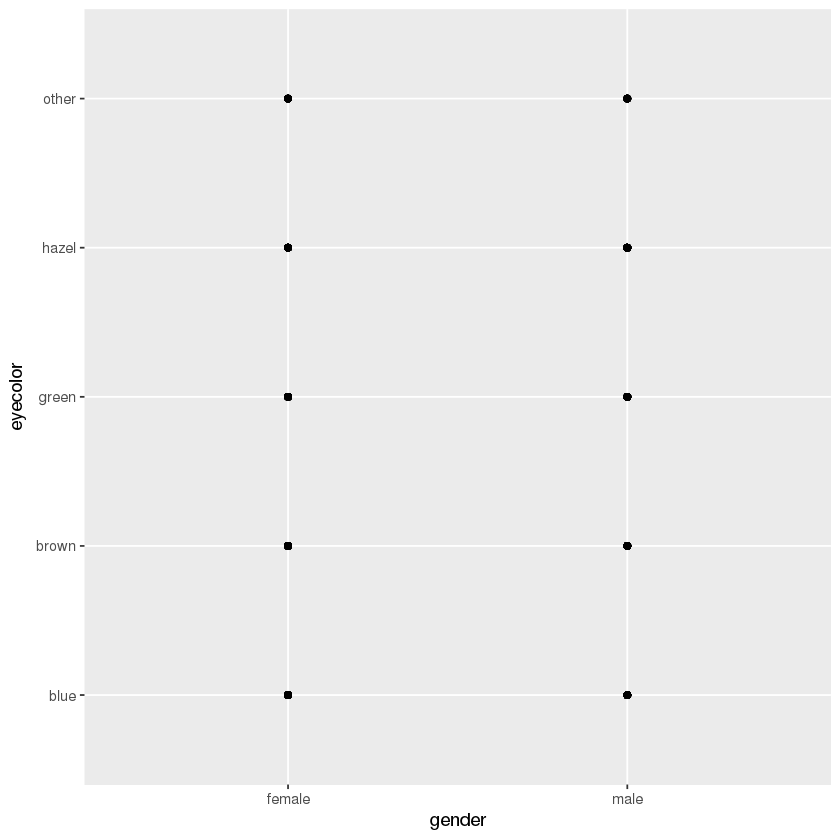

In [17]:
(e <- ggplot(ecg, aes(gender,eyecolor)) +  geom_point())

This didn't work well. When we have overplotting problem where attributes have same exact values for a large number of data rows, we should use geom_jitter() to randomly place points in a scatter plot.

**Exercise 12: ** Plot a scatter plot of gender vs. eyecolor with jitter geometry. 

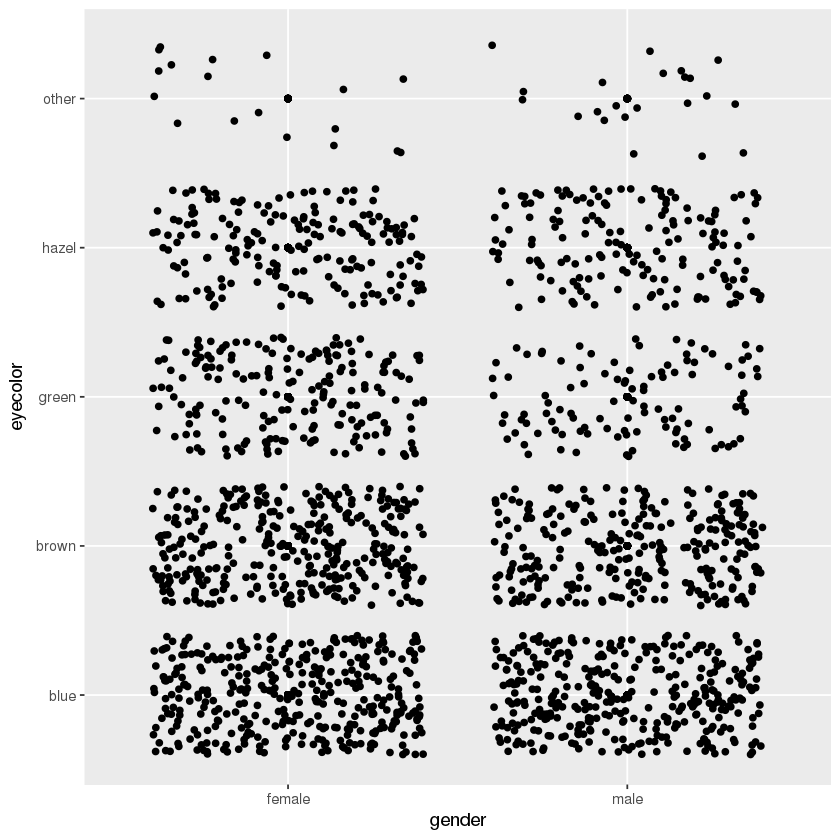

In [18]:
(e <- ggplot(ecg, aes(gender,eyecolor)) + geom_point() + geom_jitter())

We can adjust the width and height of the jitter, and also the transparency. It's intuitive to use color visual variable for the eyecolor attribute. Let's add all those to the plot. 

**Exercise 13: ** Plot a scatter plot of gender vs. eyecolor and use color for the eyecolor attribute. 

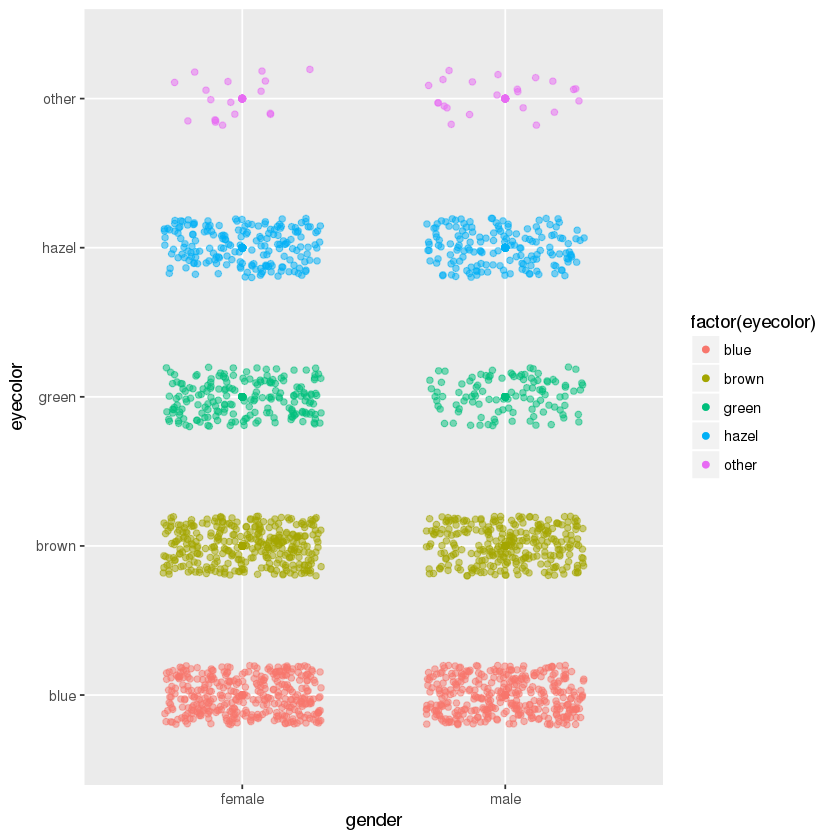

In [19]:
(e <- ggplot(ecg, aes(gender,eyecolor,color=factor(eyecolor))) + geom_point() + geom_jitter(width=0.3, height=0.2, alpha=0.50))

The colors should be intuitive, so we will manually name them with scale_color_manual() where the color values will be 
c("blue", "chocolate4", "green4", "#595c26", "black").

**Exercise 14: ** Add manual colors to the above plot.

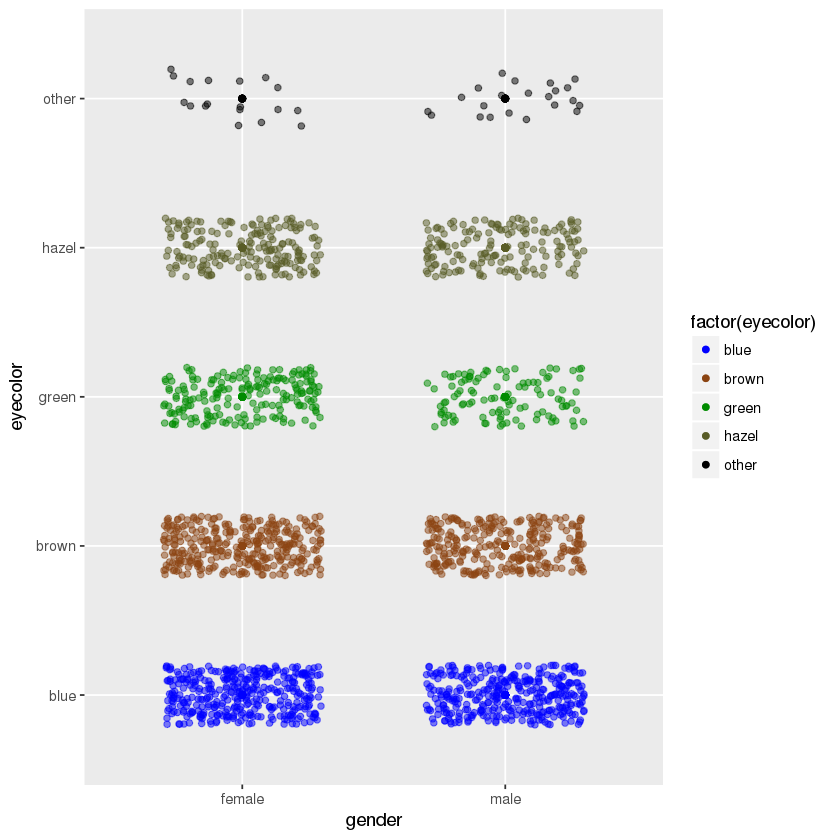

In [20]:
e <-e + scale_color_manual(values=c("blue","chocolate4","green4","#595c26","black"))
e


**Exercise 15: ** And finally add shape visual variable to encode the exercise attribute. Does it work well? Why? 


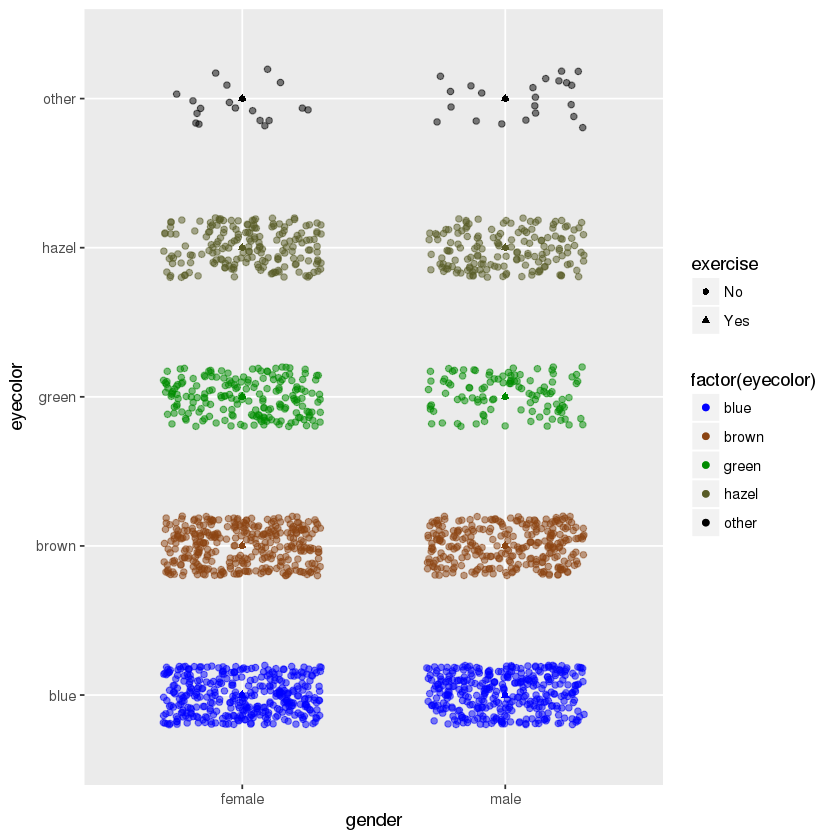

In [21]:
e <- ggplot(ecg, aes(gender,eyecolor,color=factor(eyecolor))) + geom_point(aes(shape=exercise))+ geom_jitter(width=0.3, height=0.2, alpha=0.5)
e <-e + scale_color_manual(values=c("blue","chocolate4","green4","#595c26","black"))
e

In [ ]:
# It does not work well.I is hard to discern between the subject that exercise and those who do not.

**Exercise 16: ** Plot a scatter plot of gender vs. height with small multiples for exercise. Use the techniques you applied in the above exercises. Use intuitive visual variables for the attributes. 


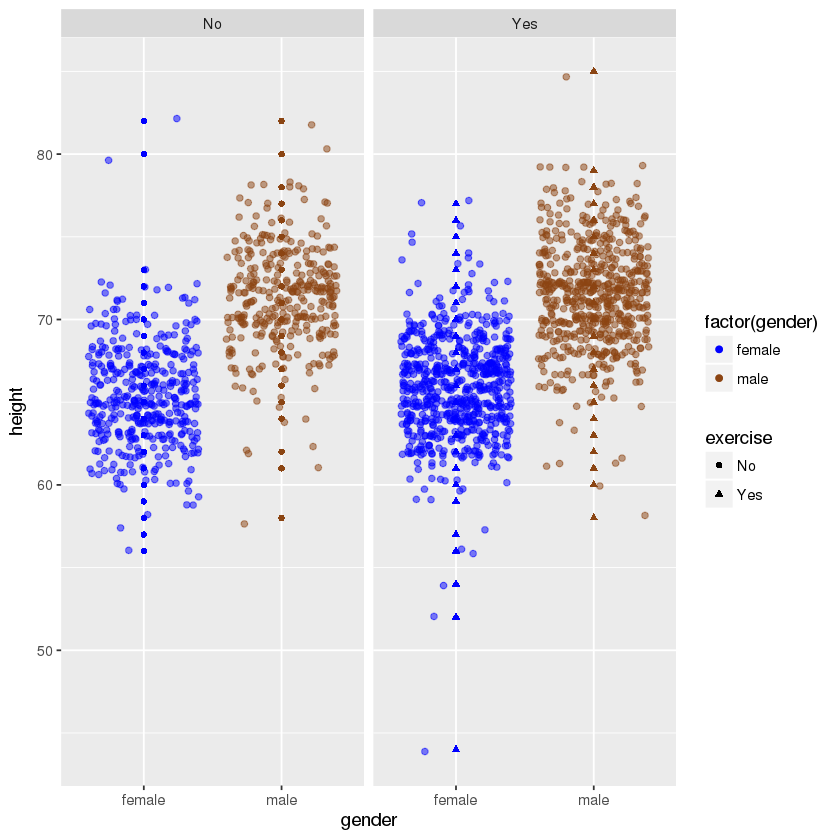

In [25]:
e <- ggplot(ecg, aes(gender,height,color=factor(gender))) + geom_point(aes(shape=exercise)) + geom_jitter(width=.4,height=.4,alpha=.5)
e <- e + scale_color_manual(values=c("blue","chocolate4","green4","#595c26","black")) + facet_wrap(~exercise)
e